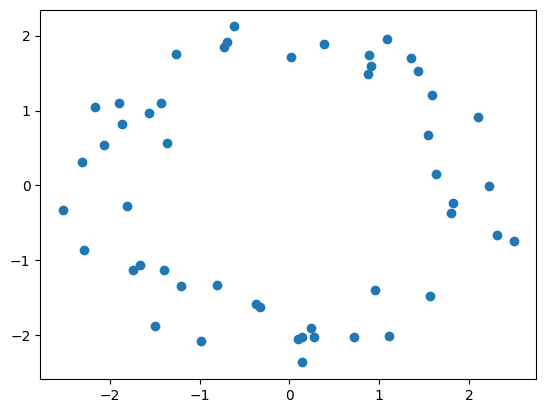

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noisy_circle_points(r, n_points, noise_variance):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    noise = np.random.normal(0, np.sqrt(noise_variance), (n_points, 2))

    x = r * np.cos(angles) + noise[:, 0]
    y = r * np.sin(angles) + noise[:, 1]

    return x, y

# Parameter
radius = 2
n_points = 50
noise_variance = 0.1

x, y = generate_noisy_circle_points(radius, n_points, noise_variance)

plt.scatter(x, y)
plt.show()


In [2]:
def gradient_E(x, y, mx, my, r):
    n = len(x)
    grad_mx = 0
    grad_my = 0
    grad_r = 0

    for i in range(n):
        dist = np.sqrt((x[i] - mx)**2 + (y[i] - my)**2)
        error = dist - r

        if dist != 0:
            grad_mx += 2 * error * (-(x[i] - mx) / dist)
            grad_my += 2 * error * (-(y[i] - my) / dist)
        grad_r += 2 * error * (-1)

    return grad_mx, grad_my, grad_r

In [11]:
def gradient_descent_E(start, learning_rate, iterations): 
    current_mx, current_my, current_r = start
    trajectory = [start]
    for _ in range(iterations):
        grad_mx_val, grad_my_val, grad_r_val = gradient_E(x, y, current_mx, current_my, current_r)
        
        current_mx -= learning_rate * grad_mx_val
        current_my -= learning_rate * grad_my_val
        current_r -= learning_rate * grad_r_val
        
        trajectory.append((current_mx, current_my, current_r))

    return current_mx, current_my, current_r, trajectory

min_mx, min_my, min_r, trajectory = gradient_descent_E((0.5, 0.1, 0.9), 0.001, 100)
min_mx, min_my, min_r, trajectory

(-0.005597201446325324,
 -0.017362512466251468,
 2.0286410683939398,
 [(0.5, 0.1, 0.9),
  (0.45575536333864897, 0.08732538031508992, 1.0187338534198487),
  (0.41685094937064, 0.07620126230396147, 1.1248052459368607),
  (0.38245147523832734, 0.06640354738712456, 1.2196184219761166),
  (0.3518785177922418, 0.057746317546353024, 1.3044079729284586),
  (0.32457664206446407, 0.050074307964955156, 1.3802629331179834),
  (0.3000877592400915, 0.04325708275709576, 1.448146520117079),
  (0.27803149339363104, 0.037184467144840846, 1.5089125386146638),
  (0.2580899959525352, 0.03176292763652289, 1.5633191750399213),
  (0.2399960922013337, 0.02691267932696329, 1.6120407139991146),
  (0.223523950920816, 0.022565357843145457, 1.6556775727036452),
  (0.20848168324515814, 0.018662134029449225, 1.6947649548035086),
  (0.19470542974080157, 0.015152178541435243, 1.7297803571182224),
  (0.18205460491762765, 0.011991404847848247, 1.7611501131536926),
  (0.17040804873997023, 0.009141435068193714, 1.789255120

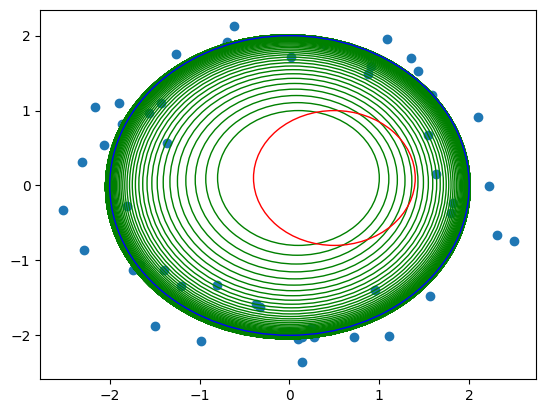

In [12]:
def visualize(start, trajectory, step):
    plt.scatter(x, y)
    c_orig = plt.Circle((0, 0), 2, color="b", fill=False)
    c_start = plt.Circle((start[0], start[1]), start[2], color="r", fill=False)
    for i in range(0, len(trajectory), step):
        c_tmp = plt.Circle((trajectory[i][1], trajectory[i][1]), trajectory[i][2], color="g", fill=False)
        plt.gca().add_patch(c_tmp)
    plt.gca().add_patch(c_orig)
    plt.gca().add_patch(c_start)
    plt.show()

visualize((0.5, 0.1, 0.9), trajectory, 1)

In [5]:
#TODO: implement visualization of error history